<a href="https://colab.research.google.com/github/Kamiilykam/pandas-challenge/blob/master/Sci_Re_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Pre-Processing

In [ ]:
#Load Data visuals Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:

#Load Pkgs
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score




In [ ]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df.head()

,Beach Name,Loggerhead nest density classification,muLength,Loggerheadnest,FalseCrawls,NDVI,NDBI,NDESI,NMDI,NDWI,SLOPE,ELEVATION,CAT
0,Tequesta Beaches,HIGH,1.4,13198,20154,0.724852,-0.993130,-0.475040,0.696732,0.463376,1.914644,10.0,5
1,Tequesta Beaches,HIGH,1.4,13198,20154,0.611526,-0.993961,0.149446,0.616734,0.285822,4.741489,12.0,5
2,Tequesta Beaches,HIGH,1.4,13198,20154,0.548077,-0.993850,-0.109342,0.575013,0.167234,1.921275,10.0,5
3,Tequesta Beaches,HIGH,1.4,13198,20154,0.107129,-0.994667,0.209199,0.552848,0.110232,3.330971,10.0,3
4,Tequesta Beaches,HIGH,1.4,13198,20154,0.399375,-0.993595,0.021055,0.585838,0.227506,0.000000,12.0,5


In [ ]:
#Check data for null values
df.isnull().sum()

Beach Name                                    0
Loggerhead nest density classification        0
muLength                                      0
Loggerheadnest                                0
FalseCrawls                                   0
NDVI                                      13206
NDBI                                      13206
NDESI                                     13206
NMDI                                      13206
NDWI                                      13206
SLOPE                                     16255
ELEVATION                                 14383
CAT                                           0
dtype: int64

In [ ]:
df= df.dropna()
df.isnull().sum()

Beach Name                                0
Loggerhead nest density classification    0
muLength                                  0
Loggerheadnest                            0
FalseCrawls                               0
NDVI                                      0
NDBI                                      0
NDESI                                     0
NMDI                                      0
NDWI                                      0
SLOPE                                     0
ELEVATION                                 0
CAT                                       0
dtype: int64

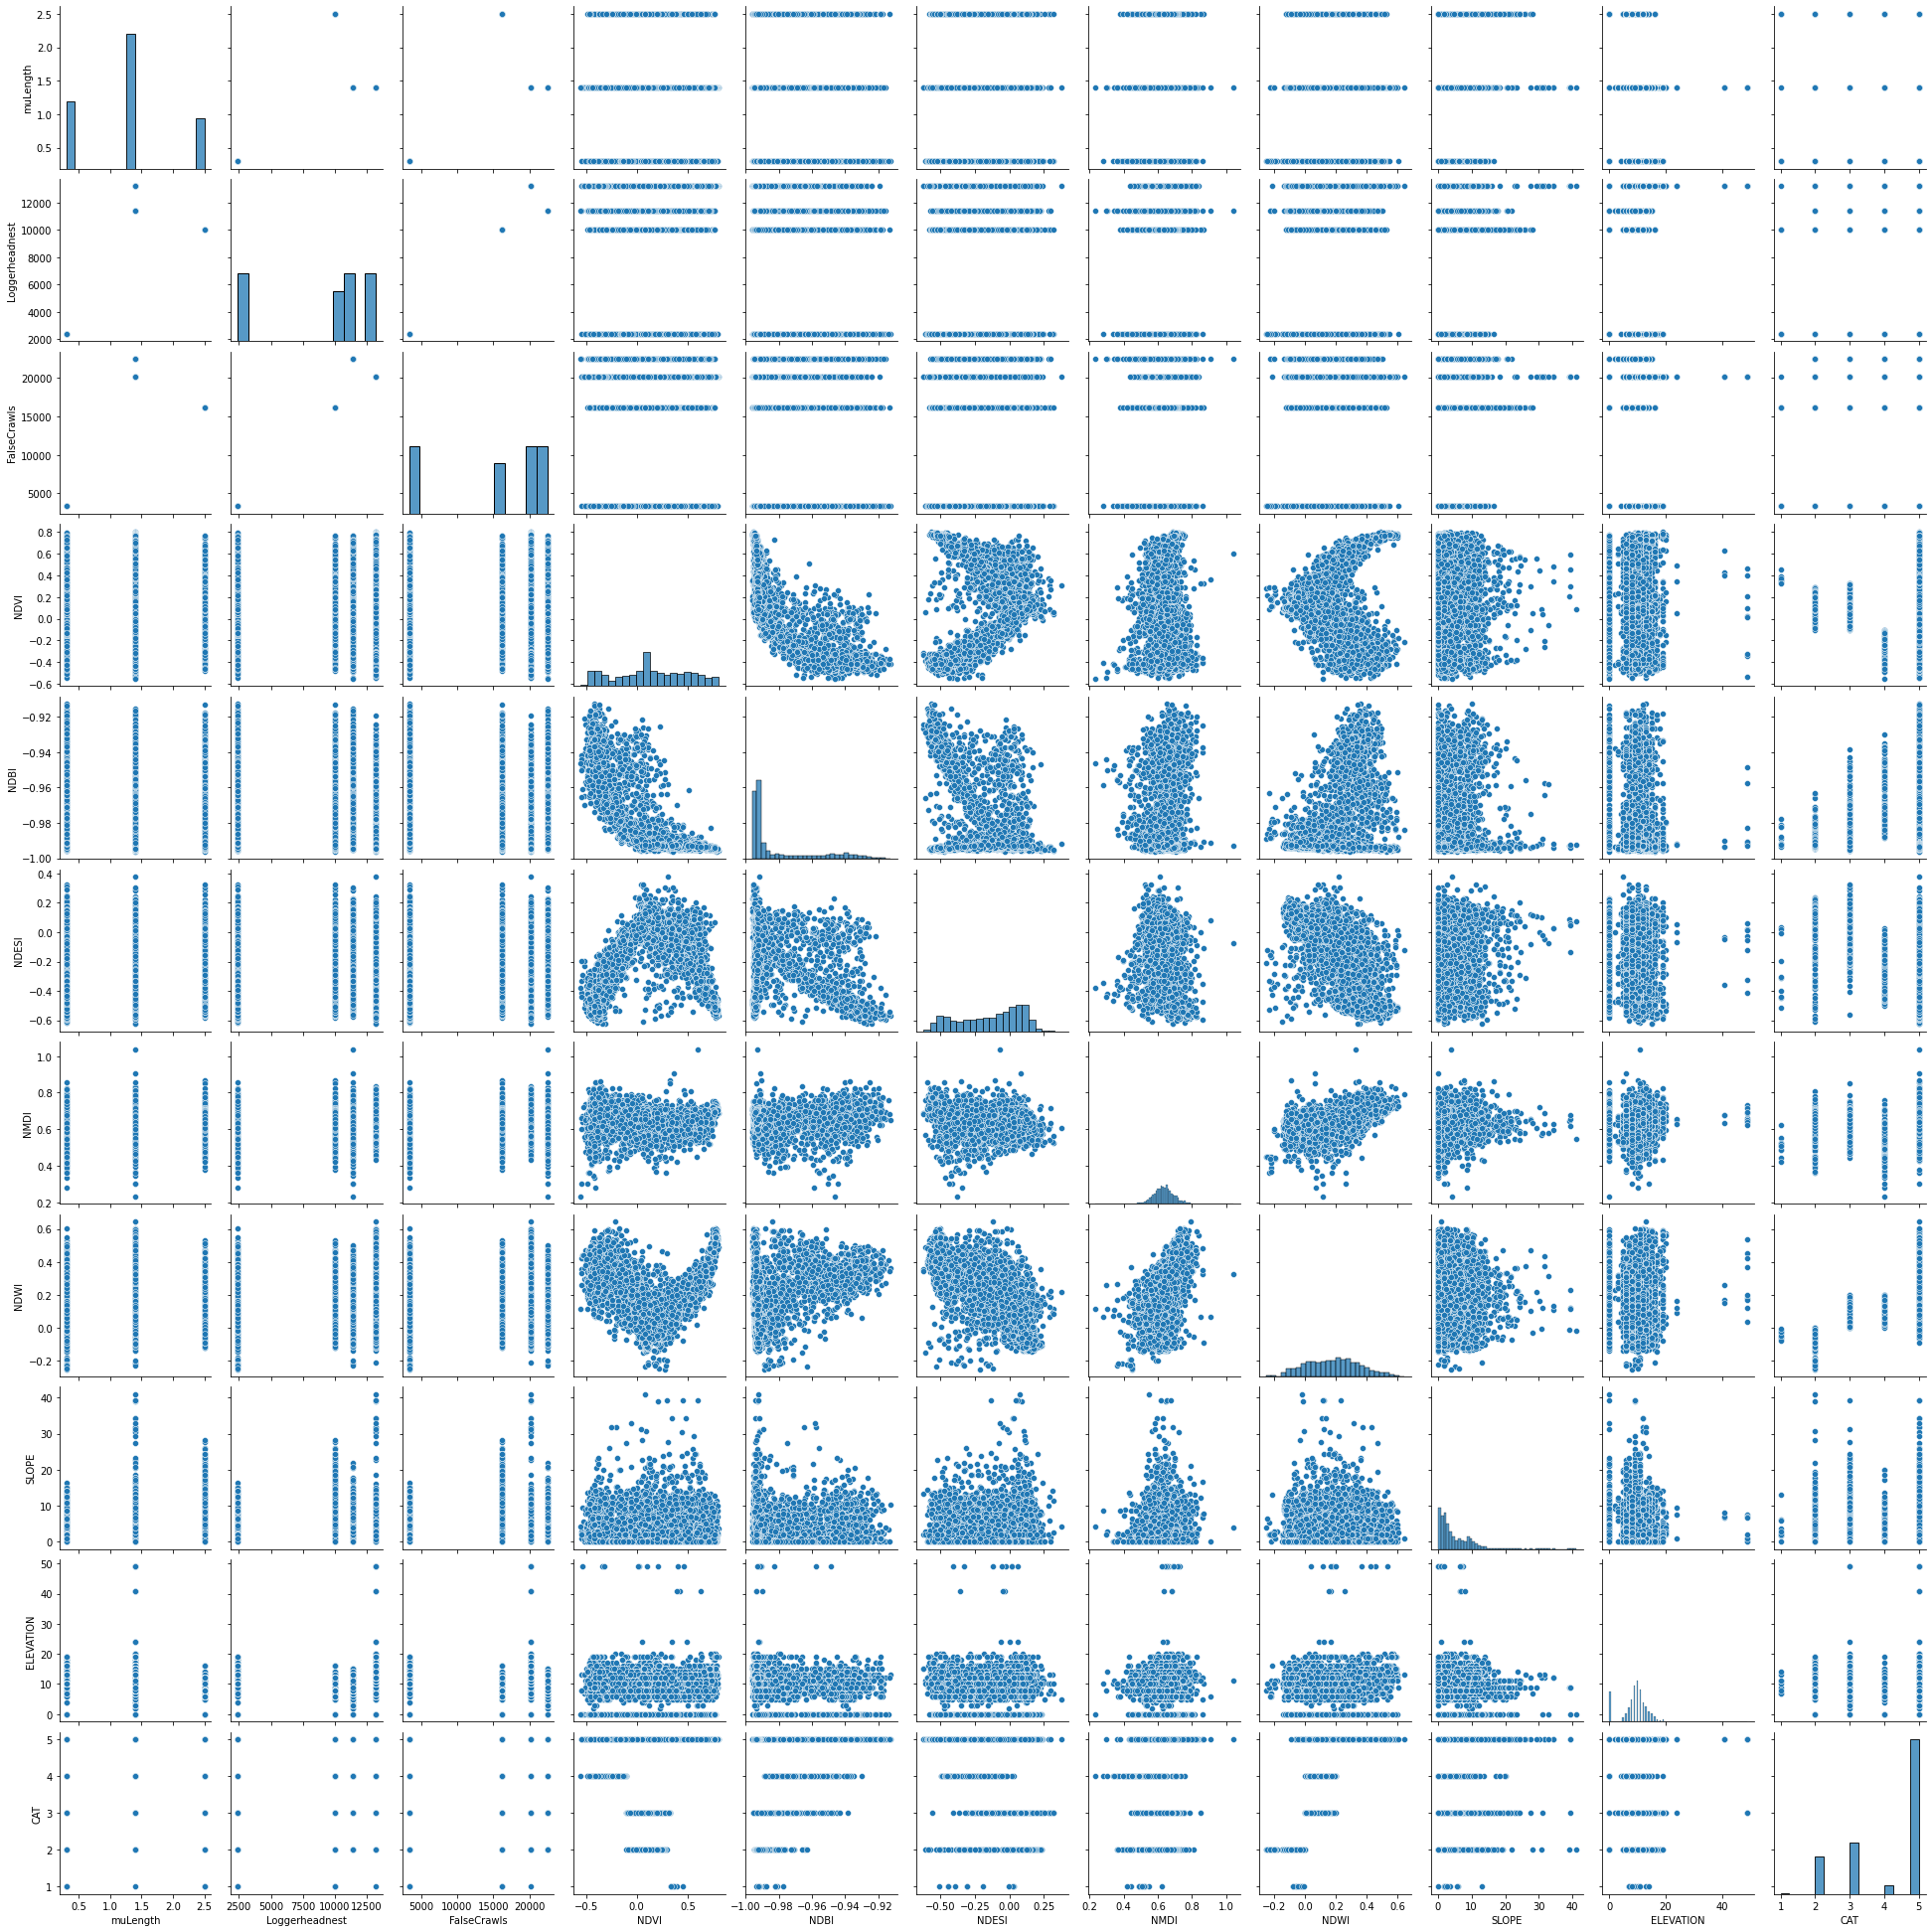

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
#Define X and Y: This is like extracting dependent and independent variables.
x=df.iloc[:,:12]
y= df.iloc[:,12]

In [ ]:
# handle categorical variable
states=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)
x

,muLength,Loggerheadnest,FalseCrawls,NDVI,NDBI,NDESI,NMDI,NDWI,SLOPE,ELEVATION,...,NDVI,NDBI,NDESI,NMDI,NDWI,SLOPE,ELEVATION,Beach Name_Jupiter Beach (including Carlin),Beach Name_Jupiter Inlet Colony,Beach Name_Tequesta Beaches
0,1.4,13198,20154,0.724852,-0.993130,-0.475040,0.696732,0.463376,1.914644,10.0,...,0.724852,-0.993130,-0.475040,0.696732,0.463376,1.914644,10.0,0,0,1
1,1.4,13198,20154,0.611526,-0.993961,0.149446,0.616734,0.285822,4.741489,12.0,...,0.611526,-0.993961,0.149446,0.616734,0.285822,4.741489,12.0,0,0,1
2,1.4,13198,20154,0.548077,-0.993850,-0.109342,0.575013,0.167234,1.921275,10.0,...,0.548077,-0.993850,-0.109342,0.575013,0.167234,1.921275,10.0,0,0,1
3,1.4,13198,20154,0.107129,-0.994667,0.209199,0.552848,0.110232,3.330971,10.0,...,0.107129,-0.994667,0.209199,0.552848,0.110232,3.330971,10.0,0,0,1
4,1.4,13198,20154,0.399375,-0.993595,0.021055,0.585838,0.227506,0.000000,12.0,...,0.399375,-0.993595,0.021055,0.585838,0.227506,0.000000,12.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,2.5,10003,16139,0.764335,-0.994021,-0.506717,0.695138,0.514970,12.791381,0.0,...,0.764335,-0.994021,-0.506717,0.695138,0.514970,12.791381,0.0,1,0,0
3741,2.5,10003,16139,0.629326,-0.993360,-0.331128,0.637447,0.247521,0.000000,0.0,...,0.629326,-0.993360,-0.331128,0.637447,0.247521,0.000000,0.0,1,0,0
3742,2.5,10003,16139,0.079747,-0.991002,0.117254,0.672979,-0.032539,4.777289,0.0,...,0.079747,-0.991002,0.117254,0.672979,-0.032539,4.777289,0.0,1,0,0
3743,2.5,10003,16139,0.084388,-0.992213,0.128616,0.653468,-0.086325,13.170510,0.0,...,0.084388,-0.992213,0.128616,0.653468,-0.086325,13.170510,0.0,1,0,0


In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
#shapes of splitted data
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (2509, 23)
X_test: (1236, 23)
Y_train: (2509,)
Y_test: (1236,)


#Multiple Linear Regression

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_prediction = LR.predict(x_test)
y_prediction

array([4.40721637, 4.60041454, 4.7030086 , ..., 3.33900428, 4.32541298,
       5.32141363])

In [ ]:
Accuracy=r2_score(y_test,y_prediction)*100
print('Accuracy of the model is %.2f'%Accuracy)

Accuracy of the model is 70.64


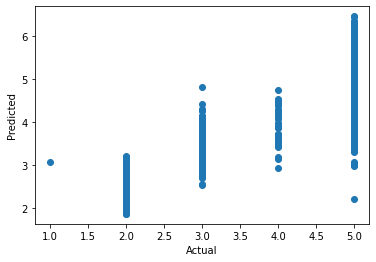

In [ ]:
plt.scatter(y_test,y_prediction);
plt.xlabel('Actual');
plt.ylabel('Predicted');

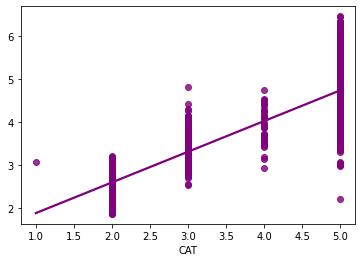

In [ ]:
sns.regplot(x=y_test,y=y_prediction, ci= None, color = 'purple');

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_prediction})
pred_df

,Actual Value,Predicted Value
3400,5,4.407216
1114,5,4.600415
351,5,4.703009
2126,3,3.670109
2323,3,3.705489
...,...,...
3652,5,5.037124
2009,5,4.834879
1457,3,3.339004
3146,5,4.325413


# XGBoost Regression

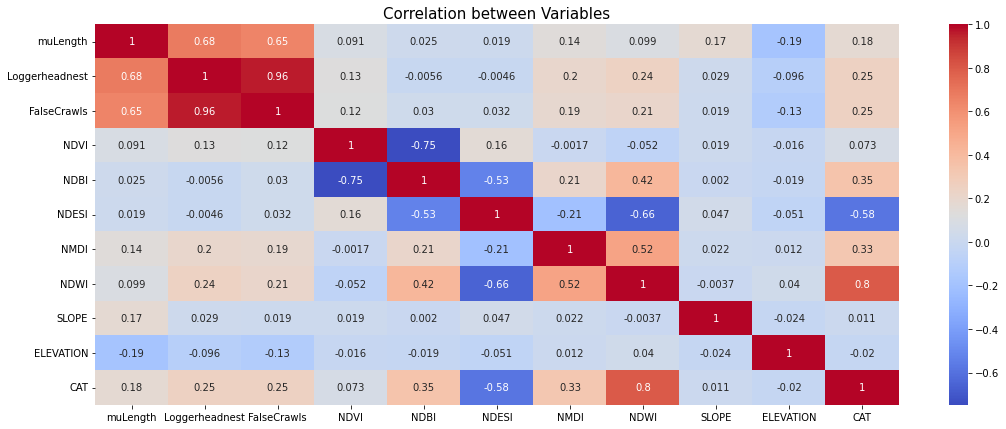

In [ ]:
#Buvariate Analysis
plt.figure(figsize=(18,7))
correlation=df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Variables',size = 15)
plt.show()


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
#import necessary Pkgs

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
st_pipeline = Pipeline([('scaler', StandardScaler()),
                        ('model', RandomForestRegressor())])

In [ ]:
# handle categorical variable
states=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)
x

In [ ]:
score = cross_val_score(st_pipeline,
                        x,
                        y,
                        scoring = 'neg_mean_squared_error',
                        cv = 10)
final_avg_rmse = np.mean(np.sqrt(np.abs(score)))
print('Final RMSE', final_avg_rmse)

Final RMSE 0.06865888892892374


In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Split Data into Trainng and Test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state=42)

In [ ]:
# Fit Data into Model from Training
st_pipeline.fit(x_train, y_train)
 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor())])

In [ ]:
# Predict the model
y_pred =st_pipeline.predict(x_test)
pd.DataFrame({'Actual':y_test,'Predicted':y_pred})[::20]

,Actual,Predicted
3400,5,5.0
1356,5,5.0
3310,5,5.0
32,3,3.0
1995,2,2.0
...,...,...
522,5,5.0
3697,2,2.0
2098,5,5.0
801,5,5.0


In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print('Accuracy of the model is %.2f'%Accuracy)

Accuracy of the model is 99.32


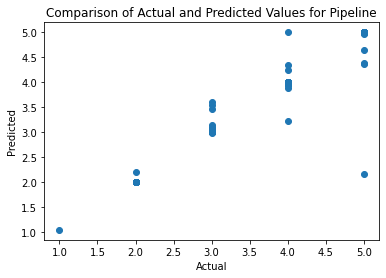

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.title('Comparison of Actual and Predicted Values for Pipeline', size = 12);

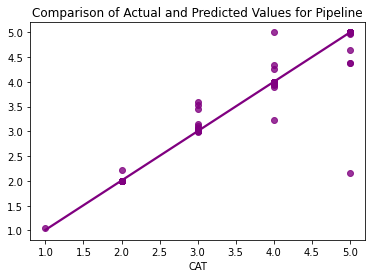

In [ ]:
sns.regplot(x=y_test,y=y_pred, ci= None, color = 'purple');
plt.title('Comparison of Actual and Predicted Values for Pipeline', size = 12);

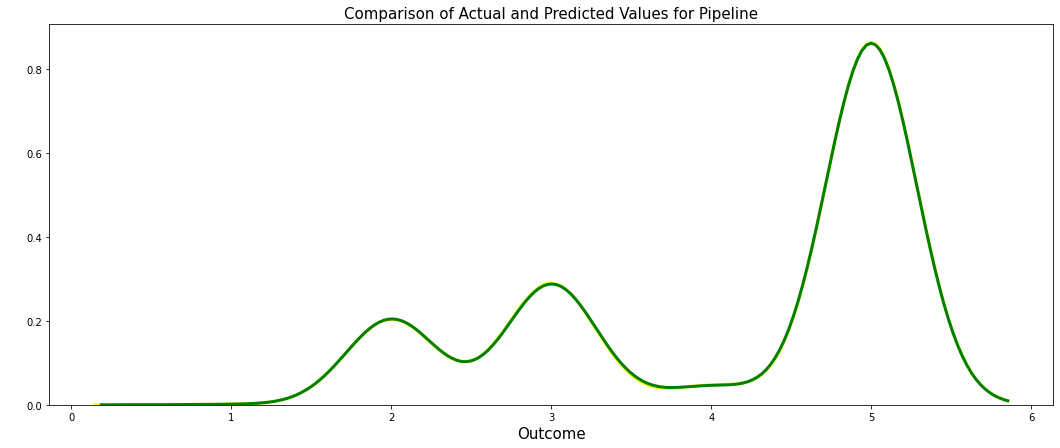

In [ ]:
plt.figure(figsize = (18,7))
sns.kdeplot(x = y_test, label = 'Actual', color = 'yellow', linewidth = 3)
sns.kdeplot(y_pred, label = 'Predicted', color ='green', linewidth = 3)
plt.title('Comparison of Actual and Predicted Values for Pipeline', size = 15)
plt.xlabel('Outcome', size = 15)
plt.ylabel(' ',size = 15)
plt.show()



> XGBoost in pipeline



In [ ]:

df= pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df= df.dropna()
#Features
x= df[df.columns.drop('CAT')]
y=df[['CAT']]

xgb_pipeline = Pipeline([('st_scaler', StandardScaler()),
                        ('xgb_model', xgb.XGBRegressor())]) 

# handle categorical variable
states=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)


score = cross_val_score(xgb_pipeline,
                        x,
                        y,
                        scoring = 'neg_mean_squared_error',
                        cv = 10)
final_avg_rmse = np.mean(np.sqrt(np.abs(score)))
print('Final XGB RMSE', final_avg_rmse)


In [ ]:
xgb_pipeline = Pipeline([('st_scaler', StandardScaler()),
                        ('xgb_model', xgb.XGBRegressor())]) 
xgb_pipeline.fit(x_train, y_train)

In [ ]:
# Fit Data into Model from Training
xgb_pipeline.fit(x_train, y_train)
 

In [1]:
y_pre =xgb_pipeline.predict(x_test)

NameError: ignored

# Tuning Hyperparameters and Cross Validation



> Tuning Hyperparameters





> Cross Validation



# Gaussian Process Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, RationalQuadratic as RQ, ExpSineSquared as Exp, DotProduct as Lin

In [ ]:
from sklearn.gaussian_process.kernels import WhiteKernel

In [ ]:
df =pd.read_csv('/content/drive/MyDrive/seaturtle.csv')
df.head()
df= df.dropna()
#Define X and Y: This is like extracting dependent and independent variables.
x=df.iloc[:,:12]
y= df.iloc[:, 12][:, None]

# handle categorical variable
states=pd.get_dummies(x,drop_first=True)
# dropping extra column
x= x.drop(['Beach Name','Loggerhead nest density classification'],axis=1)
# concatation of independent variables and new cateorical variable.
x=pd.concat([x,states],axis=1)


In [ ]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [ ]:
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process.fit(x_train, y_train)
gaussian_process.kernel_

3.72**2 * RBF(length_scale=0.555)

In [ ]:
y_mean, y_std = gaussian_process.predict(x, return_std=True)